# K fold cross validation

Vamos a trabajar con otro de los datasets que podemos importar directamente desde sklearn: load_breast_cancer


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(np.c_[data['data'], data['target']], columns= np.append(data['feature_names'], ['target']))

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


## Análisis exploratorio

¿ Cuántas filas y columnas tenemos ?

In [4]:
#COMPLETAR
df.shape

(569, 31)

Imprimir un resumen de los datos:

In [5]:
#COMPLETAR
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


¿ Cuántos casos tenemos con cada target ? 

Imprimir los valores absolutos, porcentajes y graficar

c:\Users\apacek\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


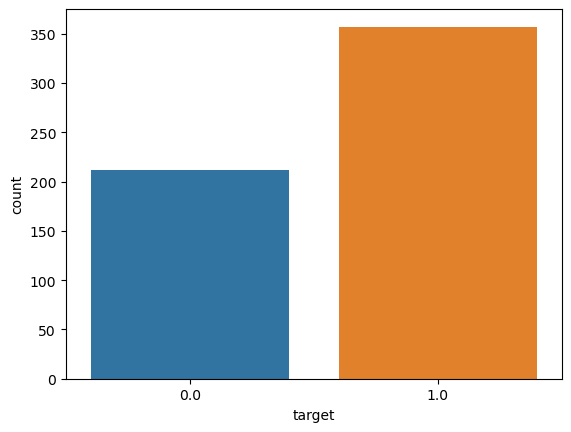

In [6]:
#COMPLETAR
sns.countplot(df['target'])
plt.show()


In [9]:
#COMPLETAR
df.target.value_counts(normalize=True)*100

1.0    62.741652
0.0    37.258348
Name: target, dtype: float64

Como tenemos muchas columnas, para facilitar el análisis tomaremos solo las primeras que contienen datos sobre la media de algún indicador.

Quedarse solo con las columnas "mean" ( y el target )

In [13]:
df = df[[col for col in df.columns if 'mean' in col]+['target']]

Imprimir un pairplot para visualizar un resumen de las features. Utilizar el target como "hue"

In [16]:
#COMPLETAR

%matplotlib qt
plt.figure(figsize=(10,10))
sns.pairplot(df, hue = 'target')
plt.show()

Imprimir una matriz de correlaciones como venimos haciendo siempre (solo la mitad, con anotaciones, buena paleta de colores, etcétera)

<AxesSubplot:>

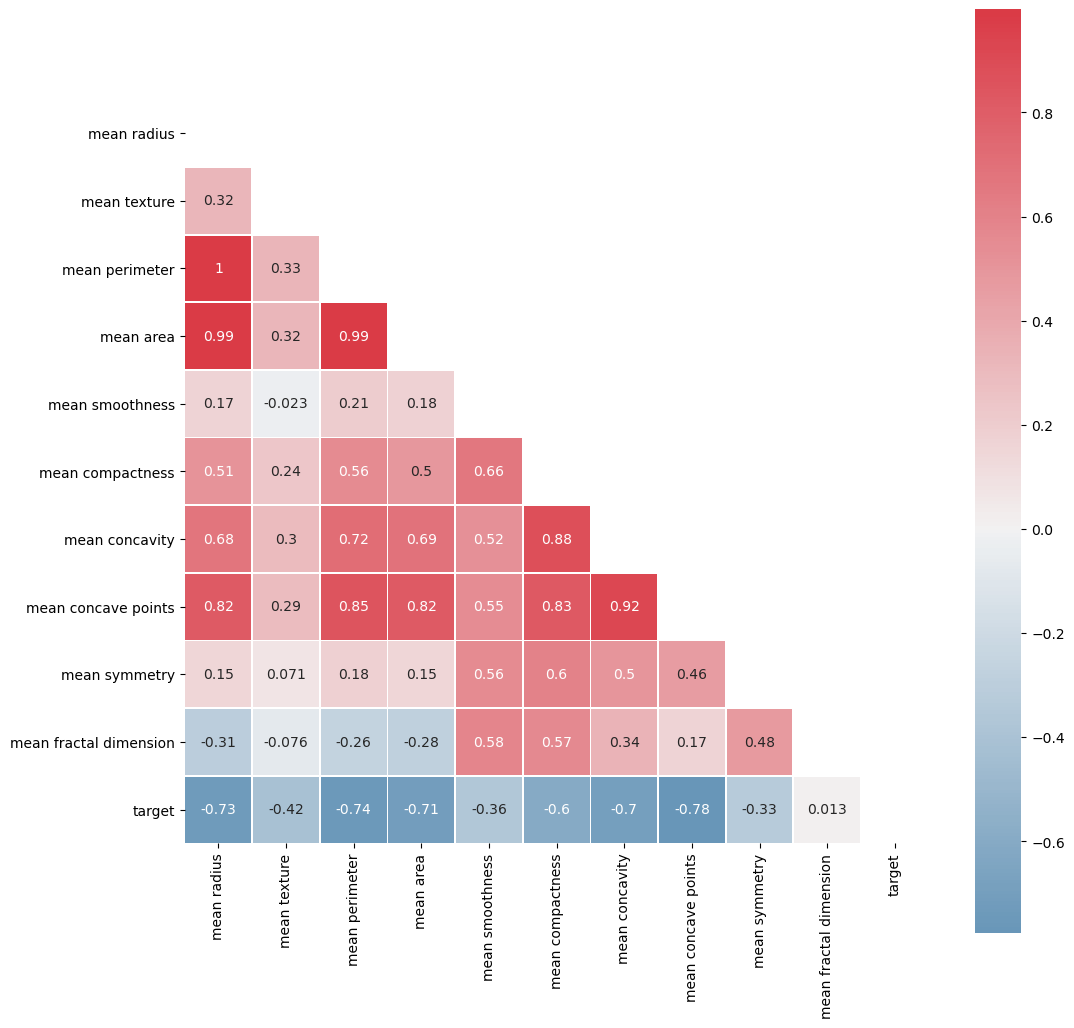

In [18]:
#COMPLETAR
%matplotlib inline
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

Ahora imprimir solo la correlación contra el target:

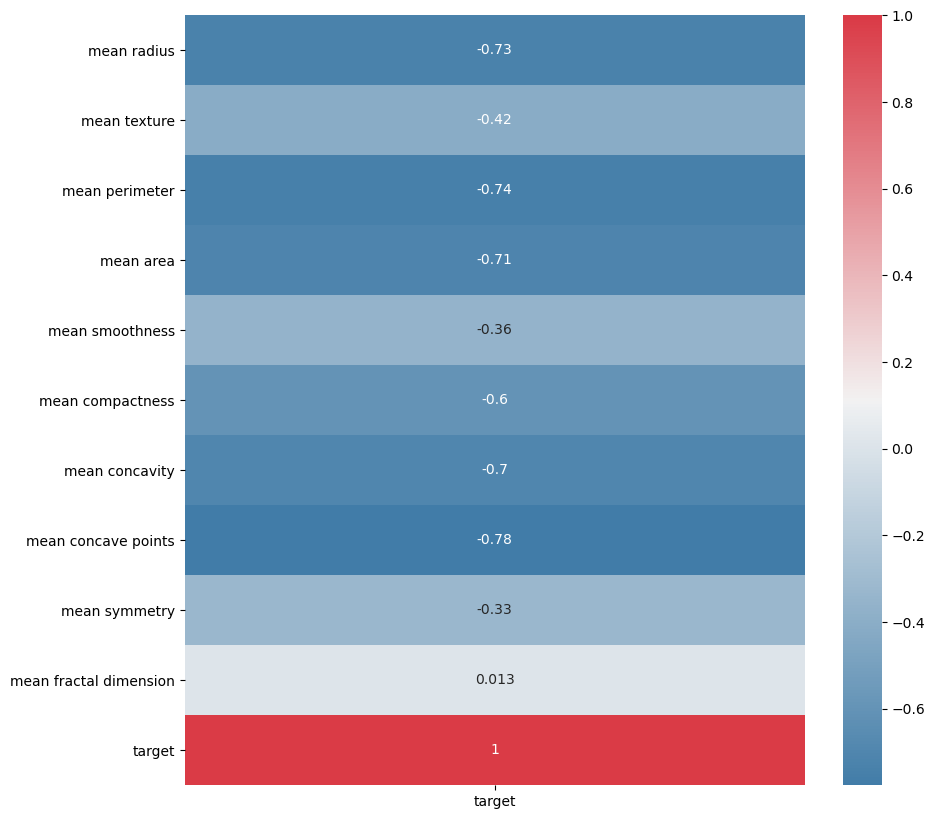

In [21]:
#COMPLETAR
target_corr = pd.DataFrame(df.corr()['target'], index=df.corr().index)

plt.figure(figsize=(10,10))
sns.heatmap(target_corr, annot=True, cmap=cmap)

plt.show()


¿ Tenemos datos nulos ?

In [22]:
#COMPLETAR

df.isna().sum()

mean radius               0
mean texture              0
mean perimeter            0
mean area                 0
mean smoothness           0
mean compactness          0
mean concavity            0
mean concave points       0
mean symmetry             0
mean fractal dimension    0
target                    0
dtype: int64

## Train test split

Hacer un train test split de los datos utilizando la función de sklearn.

Utilizar un random_state de 1 y un test_size de 0.10.

In [27]:
#COMPLETAR

X = df.drop(columns='target')
y = df.copy()['target']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y)


## Feature engineering

El único preprocesamiento que aplicaremos sobre los datos sera un StandardScaler para poder entrenar luego un KNN.

El preprocesamiento lo hacemos sobre el set de train y luego lo aplicamos al de test antes de generar las predicciones.


Ahora escalar los datos con un StandardScaler

In [28]:
#COMPLETAR

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

En y_train e y_test, ¿la proporcion de 1s y 0s en las etiquetas es similar? Graficar y escribir los valores en porcentajes

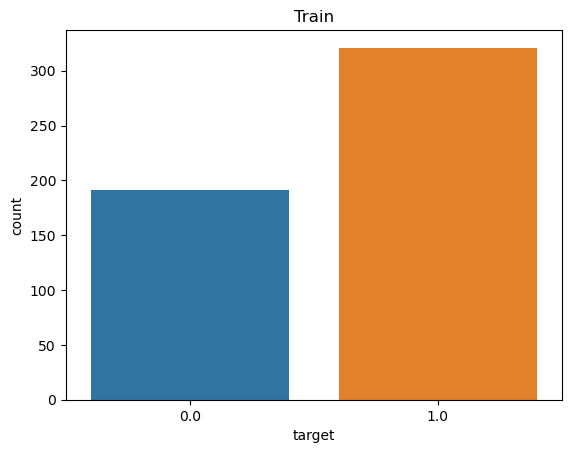

In [29]:
#COMPLETAR
sns.countplot(x=y_train)
plt.title("Train")
plt.show()

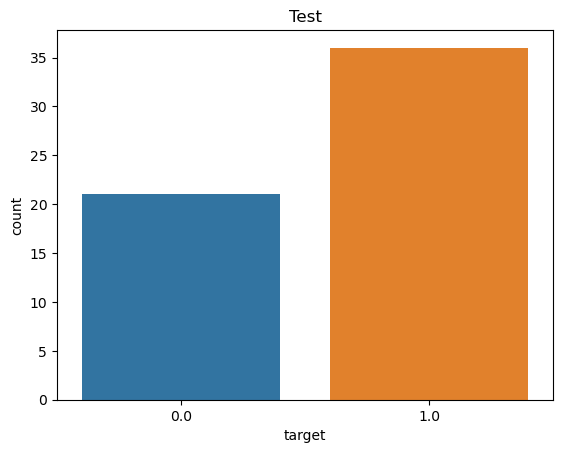

In [30]:
#COMPLETAR
sns.countplot(x=y_test)
plt.title("Test")
plt.show()

In [31]:
print('Proporcion de etiquetas positiva en los datos de Train: ',  y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Test: ', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train:  0.626953125
Proporcion de etiquetas positiva en los datos de Test:  0.631578947368421


Para pensar

¿ Cómo podemos hacer que sean iguales ?

¿ Cuál sería el accuracy score del modelo más sencillo que podemos crear ?

Vamos a entrenar un KNN y un árbol de decisión.

Comencemos por el árbol.

Definir un árbol que tenga max_depth infinito y entrenarlo con los datos de train

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#COMPLETAR

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [49]:
# ploteo la importancia features
# plt.figure(figsize=(8, 8))
# tree_feature_importance = pd.DataFrame({'feature': tree.feature_names_in_,
#                                        'weight': tree.feature_importances_}).sort_values('weight',ascending=False).head(15)
# sns.barplot(data=tree_feature_importance, x='weight', y='feature')
# plt.show()


Ahora, medir el accuracy score de nuestras predicciones ( en train y test )

In [39]:
#COMPLETAR
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.8947368421052632


Ahora vamos a entrenar un KNN.

Entrenar un KNN que tenga n_neighbors = 1 y generar las predicciones para train y test:

In [50]:
#COMPLETAR

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [51]:
#COMPLETAR

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

c:\Users\apacek\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\apacek\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.9473684210526315


¿ Qué pasa si ahora volvemos a hacer exactamente lo mismo, pero al momento del train_test_split utilizamos un random state de 42 ?

Volver a hacer lo mismo con ambos modelos pero partiendo de un train test split con random_state=42

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

tree = DecisionTreeClassifier(max_depth = None)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.9122807017543859


In [54]:
#COMPLETAR
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.8947368421052632


c:\Users\apacek\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\apacek\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

¿ Los accuracy scores cambiaron ?

Por esto es una buena práctica evaluar nuestro modelo con cross-validation.

Para sets muy grandes de datos y modelos que demoren en entrenar / predecir, esto puede volverse lento y consumir muchos recursos. Pero siempre que sea posible hacerlo, es una buena práctica para obtener una idea más real sobre el desempeño de nuestro modelo.

### Cross validation

Una de las funciónes que tiene sklearn para hacer cross validation es cross_val_score: [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

Vamos a utilizarla para evaluar nuestros modelos.

Primero que nada, importar la función:

In [55]:
#COMPLETAR
from sklearn.model_selection import cross_val_score

Ahora, definir un decision tree con todos los parámetros por defecto que trae:

In [56]:
#COMPLETAR
tree = DecisionTreeClassifier()

Aplicar la funcion cross_val_score con nuestro árbol, utilizando los conjuntos de datos X e y.

Como valor para cv, vamos a utilizar 5.

In [62]:
#COMPLETAR

tree_scores = cross_val_score(tree, X_train, y_train, cv=10)

Imprimir los resultados

In [63]:
#COMPLETAR

tree_scores

array([0.92307692, 0.96153846, 0.96078431, 0.94117647, 0.88235294,
       0.90196078, 0.94117647, 0.90196078, 0.94117647, 0.92156863])

¿ Cuál es la media ?

In [64]:
#COMPLETAR

print(tree_scores.mean())

print(tree_scores.std())

0.9276772247360483
0.02494953035069428


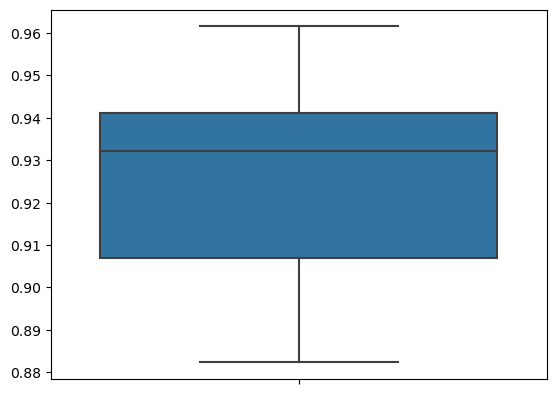

In [65]:
sns.boxplot(y=tree_scores)
plt.show()


Ahora hacer lo mismo con un KNN:

In [66]:
#COMPLETAR

knn = KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)

c:\Users\apacek\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\apacek\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [67]:
#COMPLETAR

knn_scores

array([0.85436893, 0.89320388, 0.87254902, 0.85294118, 0.83333333])

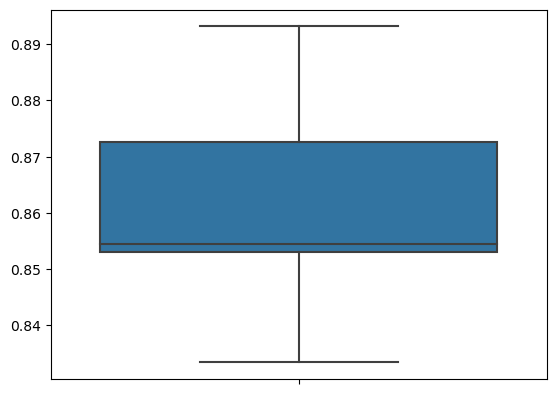

: 

In [71]:
sns.boxplot(y=knn_scores)
plt.show()


In [68]:
#COMPLETAR

knn_scores.mean()

0.8612792689891491

In [70]:
knn_scores.std()

0.02022097996467033

Los scores que obtuvimos, ya no dependen tanto del train_test_split que hagamos.

### Sklearn pipelines

Vamos a armar nuestro modelo utilizando pipelines de sklearn.

[Documentación pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

En un pipeline de sklearn debemos definir todas las transformaciones que nuestro modelo necesita. En general tenemos Imputers, Scalers, etc y finalmente un modelo predictivo.

Lo primero que debemos hacer es definir un pipeline importándolo desde sklearn.Al objeto se le inyecta una lista de tuplas. Cada una de las tuplas contiene dos elementos, una cadena con el nombre y el objeto con la transformación. Finalmente, el objeto pipe se utiliza como un estimador para obtener un modelo. El cual es el resultado de aplicar las transformaciones y el estimado en el orden indicado al conjunto de datos.

Si necesitamos hacer una transformación que no está implementada en sklearn, podemos definir nuestras propias clases para implementar dichas transformaciones. Si hacemos esto, debemos siempre implementar los métodos __init__, fit y transform.

Vamos a arrancar definiendo nuestra propia clase llamada FeatureSelector. La transformación que aplicará esta clase (al hacer transform) será retornar solo el set de columnas especificados de un dataframe.

Importar pipeline:

In [1]:
#COMPLETAR
from sklearn.pipeline import Pipeline

Vamos a importar también BaseEstimator y TransformerMixin para implementar nuestro propio transformador (FeatureSelector)

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

En la siguiente celda, definimos nuestro propio transformador:

In [3]:
class FeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return X[self.columns]


Vemos que se implementan los métodos __init__, fit y transform. En este caso, en el fit no hacemos nada y simplemente retornamos self (el mismo objeto). Al hacer transform, retornamos solo las columnas que se habían especificado al momento de instanciar un FeatureSelector.

Veamos un ejemplo.

Vamos a utilizar el FeatureSelector para quedarnos solo con las columnas "mean radius", "mean texture", "target" de df.

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [8]:
fs = FeatureSelector(["mean radius", "mean texture", "target"])

df_test = fs.fit_transform(df)

In [9]:
df_test.head()

,mean radius,mean texture,target
0,17.99,10.38,0.0
1,20.57,17.77,0.0
2,19.69,21.25,0.0
3,11.42,20.38,0.0
4,20.29,14.34,0.0


Vemos que funciona de la misma forma que los objetos de sklearn (tiene fit, transform, fit_transform).

Ahora, veamos como se utiliza el Pipeline de sklearn basándonos en el ejemplo de la documentación:

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_1, y_1 = make_classification(random_state=0)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set

pipe.fit(X_train_1, y_train_1)

pipe.score(X_test_1, y_test_1)

0.88

SVC es un modelo para clasificación que veremos más adelante. Por ahora deben saber que al igual que nuestro KNN o DecisionTree, tiene un fit y predict y genera predicciones.

Implementemos un pipeline para nuestro modelo knn.

Los pasos que se tienen que implementar son:

1. Feature selection: Quedarnos con las features mean radius, mean texture, mean perimeter
2. StandardScaler
3. KNN classifier con n_neighbors=3

Primero que nada vamos a volver a definir X_train, X_Test, etc para tenerlos limpios ya que anteriormente los estuvimos modificando:

In [11]:
X = df.drop(columns = ['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

Ahora, definir el pipeline:

In [17]:
#COMPLETAR


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline([
    ("featureSelector", FeatureSelector(["mean radius", "mean texture", "mean perimeter"])),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=3))
])

Entrenarlo y generar las predicciones en train y test

In [18]:
#COMPLETAR

knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('featureSelector',
                 FeatureSelector(columns=['mean radius', 'mean texture',
                                          'mean perimeter'])),
                ('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [19]:
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

c:\Users\apacek\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\apacek\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

medir accuracy_score:

In [22]:
#COMPLETAR
print('Accuracy sobre conjunto de Train:', accuracy_score(train_preds,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(test_preds,y_test))

Accuracy sobre conjunto de Train: 0.93359375
Accuracy sobre conjunto de Test: 0.9122807017543859


El pipeline lo podemos utilizar en conjunto con cross validation. En lugar de pasarle un knn o un tree, podemos pasarle nuestro pipeline entero.

Aplicar cross validation como hicimos antes sobre KNN y el árbol pero con el pipeline completo:

In [26]:
#COMPLETAR

from sklearn.model_selection import cross_val_score
knn_scores = cross_val_score(knn_pipe, X_train, y_train, cv=5)

c:\Users\apacek\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\apacek\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

In [27]:
knn_scores

array([0.91262136, 0.89320388, 0.90196078, 0.91176471, 0.84313725])

In [28]:
#COMPLETAR
knn_scores.mean()

0.8925375975632971

Estos pipelines son muy útiles ya que nos permiten hacer las cosas de una forma ordenada y no tener que duplicar tanto código. 

Definiendo bien un pipeline, podemos replicar las transformaciones que hicimos sobre el set de entrenamiento a el set de test de una forma muy simple como vimos en los ejemplos.